In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.10.0'

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


detector = cv2.FaceDetectorYN.create(
    "model/face_detection_yunet_2023mar.onnx",  # Path to the model
    "",  # Configuration file (if needed)
    (320, 320),  # Input size
    0.8,  # Score threshold
    0.3,  # NMS threshold
    5000  # Maximum number of faces
)


In [4]:

image = cv2.imread("face_img/akhavan.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))
#
result = detector.detect(image)

In [5]:
result

(1,
 array([[278.29257   , 120.260124  , 118.09472   , 166.48842   ,
         317.86932   , 183.61421   , 371.9579    , 193.54344   ,
         341.57446   , 221.36572   , 308.50247   , 238.62651   ,
         356.3415    , 247.92789   ,   0.94079536]], dtype=float32))

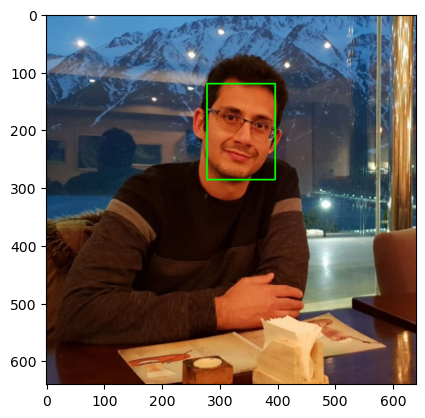

In [6]:
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), 2)
plt.imshow(image[...,::-1])

In [7]:

image = cv2.imread("face_img/team.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))
#
result = detector.detect(image)

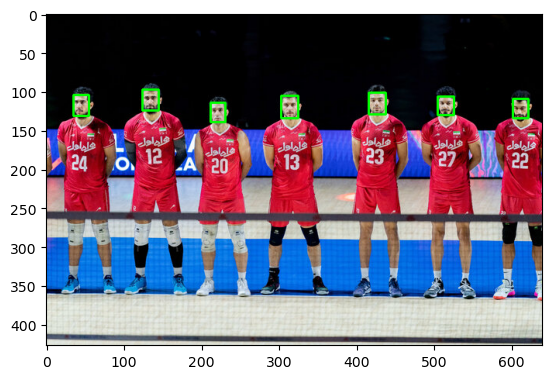

In [8]:
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), 2)
plt.imshow(image[...,::-1])

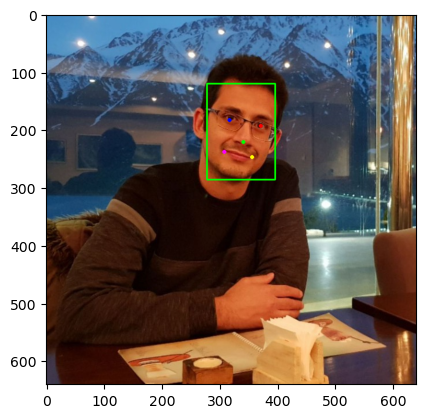

In [9]:

image = cv2.imread("face_img/akhavan.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))
#
result = detector.detect(image)
thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
        cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
        cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
        cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
        cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
        cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

plt.imshow(image[...,::-1])

In [10]:
def add_landmarks(image, thickness=2):
    if result[1] is not None:
        for idx, face in enumerate(result[1]):
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
            cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
            cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
            cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
            cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)
    
    
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
detector.setInputSize((width, height))

while True:
    _, frame = cap.read()
    result = detector.detect(frame)
    add_landmarks(frame)
    cv2.imshow("camera", frame)
    if cv2.waitKey(10)==ord("q"):
        break
cv2.destroyAllWindows()
cap.release()

## face align
more: https://github.com/Alireza-Akhavan/deep-face-recognition/blob/master/7_face-align-with-eyes.ipynb

In [12]:
import cv2
import numpy as np
from PIL import Image
import math

# Define EuclideanDistance function
def EuclideanDistance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Define the face alignment procedure
def alignment_procedure(img, left_eye, right_eye):
    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    # Determine the rotation direction based on eye positions
    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1  # Clockwise rotation
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1  # Counter-clockwise rotation

    # Calculate the triangle sides' lengths
    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    # Apply the cosine rule to calculate the angle
    if b != 0 and c != 0:
        cos_a = (b * b + c * c - a * a) / (2 * b * c)
        angle = np.arccos(cos_a)  # Angle in radians
        angle = (angle * 180) / math.pi  # Convert radians to degrees

        if direction == -1:
            angle = 90 - angle  # Adjust angle for clockwise rotation

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))  # Rotate the image based on the angle

    return img

# Function to add landmarks (landmark points) to the image
def add_landmarks(image, result, thickness=2):
    if result[1] is not None:
        for idx, face in enumerate(result[1]):
            coords = face[:-1].astype(np.int32)
            # Draw a rectangle around the face
            cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            # Draw circles for key facial points (eyes, nose, etc.)
            cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)  # Left eye
            cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)  # Right eye
            cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)  # Nose
            cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)  # Left mouth corner
            cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)  # Right mouth corner

# Main function to process the video feed
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
detector.setInputSize((width, height))  # Set the input size for the detector

while True:
    _, frame = cap.read()
    result = detector.detect(frame)  
    add_landmarks(frame, result)  

    if result[1] is not None:
        for face in result[1]:
            left_eye = (face[4], face[5])  # Left eye coordinates
            right_eye = (face[6], face[7])  # Right eye coordinates
            
            # Align the face based on eye positions
            aligned_img = alignment_procedure(frame, left_eye, right_eye)
            
            # Crop the face region from the aligned image
            x, y, w, h = map(int, face[:4])  
            cropped_face = aligned_img[y:y+h, x:x+w]
            
            cv2.imshow("Aligned and Cropped Face", cropped_face)

    cv2.imshow("camera", frame)

    if cv2.waitKey(10) == ord("q"):  
        break

cv2.destroyAllWindows()  
cap.release()  
